#### Import Necessary Libaries

In [90]:
import pandas as pd               #import pandas library
import os                         #import os library
import numpy as np                #import numpy library
import matplotlib.pyplot as plt   #import Matplot library

In [91]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv") #reading one csv file

#### Merging 12 seperate files into single csv file

In [92]:
#listing all files in a directory and calling 'dir_files'
dir_files = [file for file in os.listdir('./Sales_Data')]

for file in dir_files:        #printing all files in directory (to check)
    print(file)

    

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [93]:
combined_data = pd.DataFrame()   #create empty data-frame

for file in dir_files:
    df = pd.read_csv("./Sales_Data/"+file)
    combined_data = pd.concat([combined_data, df]) #merges dataframes of all files

#combined_data.to_csv("all_data.csv", index=False) #converts merged dataframe into csv file
                                                   #index=False doesn't import assigned index
#Note line commented to stop crash once run once


### Analysis of the Data

In [94]:
all_data = pd.read_csv("all_data.csv")
all_data.head() 
#note you can put a number in the () for '.head()' to say how much data you want to show

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Up Data 

#### Removing NaN values

In [95]:
#finding rows in data with NaN values
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

#removes NaN values in all_data and adapts that file
all_data = all_data.dropna(how = 'all') 
#note this can = 'any' or 'all' depending on if you want to get rid of rogue rows,
#or just rows where all values are NaN

#### Find 'Or' and delete it (due to duplicated column headers)

In [96]:
#make temporary file to see where 'Or' is found in the first two characters of specifiec column
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

#Thus can make data in all_data all columns EXCEPT those where month equals 'Or'
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
#note '!=' means does NOT equal too


#### Convert columns to correct type

In [97]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#note 'pd.to_numeric()' automatically decides what the values should be 

### Q) Calculating the best month for sales and how much was earned in that month?

In [98]:
#Adding additional columns

#Month Column:
all_data['Month'] = all_data['Order Date'].str[0:2]
# adding column called "Month" = the first 2 characters from the column "Order Date"
#note have converted to a string to make easier (.str)

all_data['Month'] = all_data['Month'].astype('int32') #manipulating month column to convert to interger 

#Sales Cost Columns:
all_data['Sales Cost'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [99]:
Month_Costs = all_data.groupby('Month').sum()
print(type(['Month_Costs']))  #finds the type of an object

#Finding month (index) where Sales Cost is maximum
Month_Costs['Sales Cost'].idxmax()

<class 'list'>


12

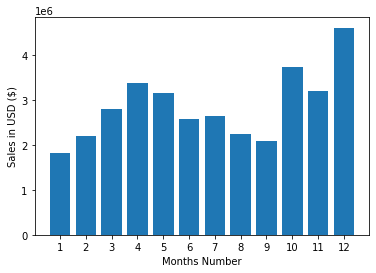

In [105]:
#creating quick plot to visulaise monthly costs
months = range(1,13)   #setting 'months' as values between 1 and 13
plt.bar(months, Month_Costs['Sales Cost'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months Number')
plt.show()

### Q) What US City had the highest number of sales?

In [106]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Cost
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [128]:
print(all_data['Purchase Address'].unique()) #give all unique values in a column

#Adding additional columns

#City Column:
#Using the '.apply()' function

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
#we are saying for wach of these cell contents, we want to split it by commas and then grab the first index
#lambda x grabs the cell content 

#also returns the state
def get_state(address):
    return address.split(',')[2].split(' ')[1]    #splitting on the 2nd white space (' ')

#Alternative Method:
#Use functions...

def get_city(address):
    return address.split(',')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

#can also reformat as .apply(lambda x: f"{get_city(x)} ({get_state(x))}")

#note if you want to remove extra columns:
#all_data = all_data.drop(columns = '______')
#or
#all_data.drop(columns = '______', inplace=True)

['917 1st St, Dallas, TX 75001' '682 Chestnut St, Boston, MA 02215'
 '669 Spruce St, Los Angeles, CA 90001' ...
 '981 4th St, New York City, NY 10001'
 '840 Highland St, Los Angeles, CA 90001'
 '220 12th St, San Francisco, CA 94016']


In [134]:
all_data.head()
City_Costs = all_data.groupby('City').sum() #group results by cities

City_Costs['Sales Cost'].idxmax()    #finding city with max sales

' San Francisco (CA)'

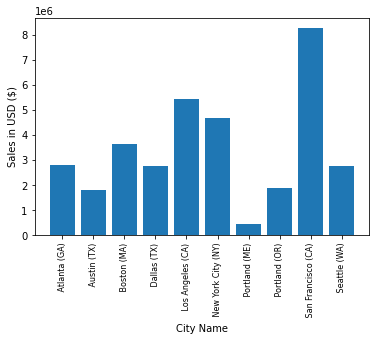

In [144]:
#creating quick plot to visulaise city costs
cities = [city for city, df in all_data.groupby('City')]   #setting cities in same order as presented
plt.bar(cities, City_Costs['Sales Cost'])
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

### Q) What time should we display advertisements to maximize likelihood of customer's buying a product?

In [145]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Cost,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


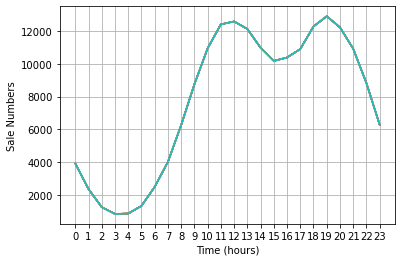

In [158]:
#convert the 'Order Date' column into a Datetime object
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
#this converts and replaces the 'Order Date' column

#create new columns for hours and minutes (using DateTime function)
#hours
all_data['Hour'] = all_data['Order Date'].dt.hour
#minutes
all_data['Minutes'] = all_data['Order Date'].dt.minute

#group data by hour
hours = [hour for hour, df in all_data.groupby('Hour')]
#count sales by hour
hour_count = all_data.groupby(['Hour']).count()     

plt.plot(hours, hour_count)
plt.xticks(hours)
plt.grid()
plt.xlabel('Time (hours)')
plt.ylabel('Sale Numbers')
plt.show()


### Q) What products are most often sold together?

In [168]:
#if have same Order ID, it means they were sold together

#create a new data frame where only multiple orders are considered

df = all_data[all_data['Order ID'].duplicated(keep=False)]
#looks at 'Order ID' column and sees which are duplicated
#the 'keep=___' says if you want to keep first, last or all occurrences 

#note clicking SHIFT + TAB gives more info about function

In [174]:
#group products together under same order ID

#create new column called 'Grouped' and list products which was sold with
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#however there are now duplicates of the same order that need to be removed
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [182]:
#now need to count the pairs 

#note: needed to import new libaries
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
#by changing value in (row_list,__) e.g 2 or 3, gives the 2 or 3 most common items sold together 
    
for key, value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### Q) What product sold the most?

In [186]:
#need to sum up quantity ordered grouped together by product
Product_Numbers = all_data.groupby('Product').sum()
Product_Numbers.head()

#Finding month (index) where Sales Cost is maximum
Product_Numbers['Quantity Ordered'].idxmax()

'AAA Batteries (4-pack)'

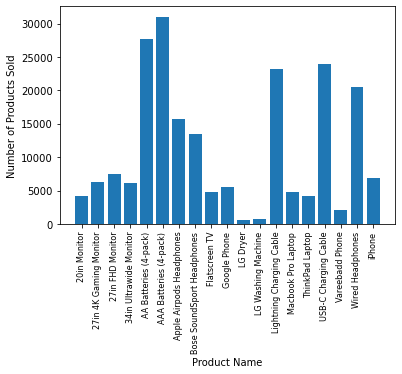

In [188]:
#creating quick plot to visulaise product quantities
products = [product for product, df in all_data.groupby('Product')]   #setting cities in same order as presented
plt.bar(products, Product_Numbers['Quantity Ordered'])
plt.xticks(products, rotation='vertical',size=8)
plt.ylabel('Number of Products Sold')
plt.xlabel('Product Name')
plt.show()

In [197]:
prices = all_data.groupby('Product').mean()['Price Each'] #find prices for each product
#list just products and prices for products
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


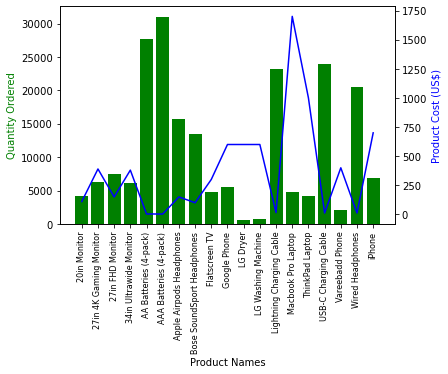

In [208]:
#plot this data in figure with quantities sold to find correlation
#creating subplot
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, Product_Numbers['Quantity Ordered'], color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Names')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Product Cost (US$)', color = 'b')

ax1.set_xticklabels(products, rotation='vertical',size=8)

plt.show()